In [169]:
# @author MSquillari
import pandas as pd
import seaborn as sbn
import numpy as np
from matplotlib import pyplot as plt

# Lo que se busca es predecir el Nro de Likes que tendrá una publicación.

In [170]:
traindf = pd.read_csv("dataset_Facebook.csv", delimiter=",")

In [171]:
traindf.head(5)

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


# https://drive.google.com/file/d/1JSup27qQ0SKMbaxnGXEuScrKjfvWE0ah/view
Post ID – Numeric permanent identification of each publication.

Permanent Link – Direct and permanent link to the publication.

Post message - The written text that goes with each publication.

Type – The kind of publication, it might be of four types: Photo, link, status or video.

Category – The kind of publication. This can be divided in: Inspirational (non explicit brand
related content), product (direct advertisement, explicit brand content) or action (special
offers and contests).

Posted – Date when the content was posted.
Impressions - Impressions are the number of times a post from your Page is displayed,
whether the post is clicked or not.

Lifetime post total reach – The number of people who saw your Page post. (Unique users)
Lifetime post total impressions – Impressions are the number of times a post from your Page
is displayed, whether the post is clicked or not. People may see multiple impressions of the
same post. For example, someone might see a Page update in News Feed once, and then a
second time if their friend shares it. 3

Lifetime engaged users – The number of people who clicked anywhere in your posts.
(Unique Users)

Lifetime post consumers – The number of people who clicked anywhere in your post. Clicks
generating stories are included in “Other Clicks.” (Unique Users)4

Lifetime post consumptions - The number of clicks anywhere in your post. Clicks generating
stories are included in “Other Clicks.” (Total Count) 5

Lifetime post impressions by people who have liked your page– Total number of impressions
just from people who have liked your page.
Lifetime post reach by people who like your page – The number of people who saw you Page
post because they have liked your page. (Unique users)

Lifetime people who have liked your page and engaged with your post – The number of
people who clicked anywhere in your posts, within the users who “like” the page. (Unique
Users)
Comments – Number of commentaries on the publication.

Likes – Number of “Likes” on the publication.

Shares – Number of times the publication was shared.

Total interactions – The sum of “likes”, “comments” and “shares” on the post.

In [172]:
# analizamos los datos
# lo que intentaremos analizar el comportamiento de los likes y shares. Para esto analizaremos las variables como la hora, mes , dia en la que se realiza el post, etc. 
# chequeamos nulls
traindf.isna().sum()


Page total likes                                                       0
Type                                                                   0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page   

In [173]:
# sacamos los nan
traindf['like'] = traindf['like'].replace(to_replace=np.nan, value=0)

In [174]:
traindf.groupby("Post Weekday").sum()

,Page total likes,Category,Post Month,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
Post Weekday,,,,,,,,,,,,,,,,,
1,8402505,138,480,509,12.0,824365,1974410,68462,58334,98598,1383613,438020,41280,539,13895.0,1684.0,16118
2,8165827,129,462,519,19.0,1097409,2076657,53129,45530,95441,1050961,488943,34237,431,11036.0,1763.0,13230
3,7909460,115,455,486,18.0,1102711,1862655,76055,65941,104339,939535,476520,48117,870,15145.0,2402.0,18417
4,8836774,133,491,556,32.0,1108563,3279613,61951,50977,80380,2212978,547066,41696,735,15750.0,2273.0,18758
5,8190799,126,469,516,21.0,866986,1479512,61530,53473,106404,793810,399874,42019,408,11534.0,1814.0,13756
6,9866839,141,551,676,20.0,1064302,2302438,70232,63427,120180,1164738,499561,48061,429,10875.0,1883.0,13187
7,10224884,158,611,658,17.0,887344,1817689,68813,61704,102223,837553,442760,49583,329,10560.0,1705.0,12594


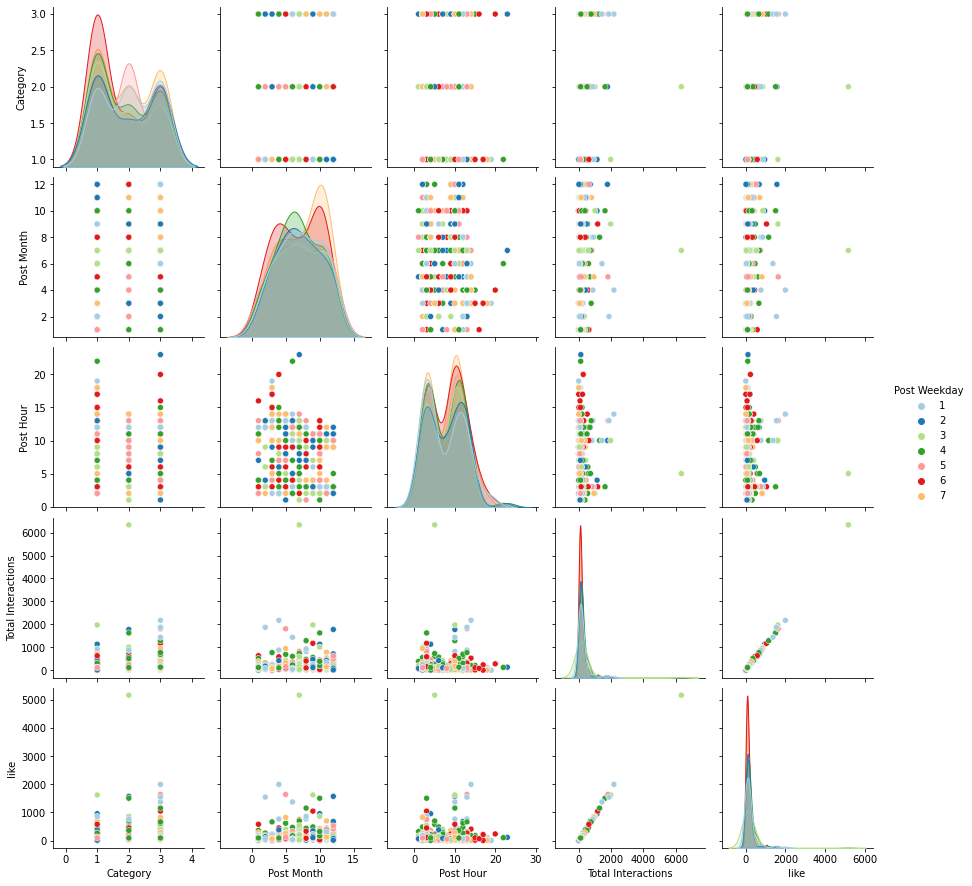

In [175]:
traindf.columns
# Selecciono estas variables ya que las que son lifetime, son variables que se originan ya cuando el post 
# ha estado publicado, lo que necesitamos es conocer las variables de inicio al momento de publicar el post
# cual o cuales de estas son mas importante a la hora de conseguir mas likes, como el dia de la semana, hora, etc.
data = traindf[["Type","Category", "Post Month", "Post Weekday", "Post Hour", "Total Interactions", "like"]]
#data.corr(method="pearson")

#sbn.pairplot(data, hue='Post Weekday',  kind='hist', markers=[1,2,3,4,5,6,7])
sbn.pairplot(data, hue='Post Weekday',  kind='scatter', palette = "Paired")


In [176]:
print(traindf[data.columns[1:]].corr()['like'][:].sort_values(ascending=False).to_frame())
print(traindf[data.columns[1:]].corr()['Post Weekday'][:].sort_values(ascending=False).to_frame())


                        like
like                1.000000
Total Interactions  0.997706
Category            0.127751
Post Month          0.024617
Post Hour          -0.024556
Post Weekday       -0.083234
                    Post Weekday
Post Weekday            1.000000
Post Hour               0.045857
Post Month              0.017050
Category               -0.053239
Total Interactions     -0.081049
like                   -0.083234


<AxesSubplot:>

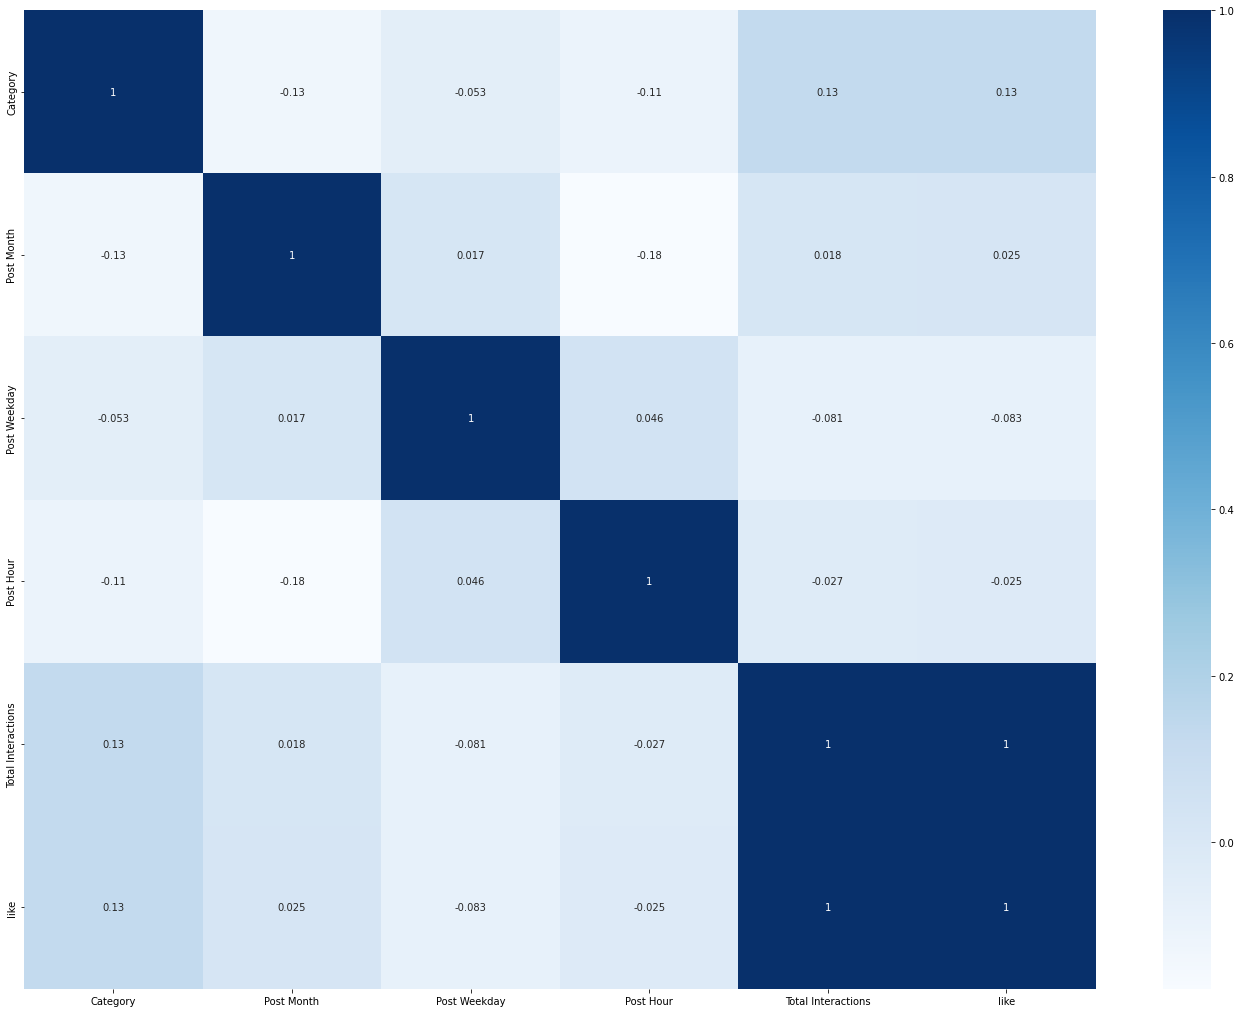

In [155]:
#Definimos la matriz de correlación como la fuente de nuestros datos
corr = data.corr()

#Definimos el tamaño de la figura para asegurar que se observen los valores interiores
ax = plt.subplots(figsize=(24,18))

#Generamos una máscara para evitar tener un espejo en la parte superior de la gráfica y simplificar la observación
#mask = np.zeros_like(corr)
#mask[np.triu_indices_from(mask)] = True

#Usando seaborn heatmap como tipo de gráfica, colocamos los valores, solicitamos que incluya las anotaciones y seleccionamos un mapa de color,
# en este caso utilizamos "viridis" y seleccionamos la máscara para no mostrar los datos duplicados, iniciando por la diagonal de unos en la 
# parte central de la gráfica
#ax = sbn.heatmap(corr,annot=True,mask = mask) # cmap='viridis'
ax = sbn.heatmap(corr,annot=True, cmap="Blues") # cmap='viridis'
ax

<AxesSubplot:xlabel='Post Weekday', ylabel='like'>

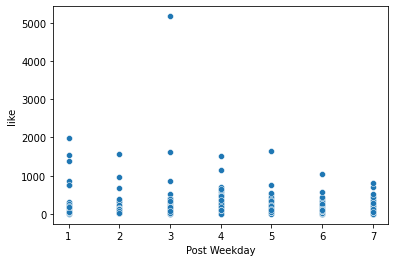

In [156]:
# sabado == 7
sbn.scatterplot(data =data[['like', 'Post Weekday']], x=data['Post Weekday'], y=data['like'])

<AxesSubplot:xlabel='Type', ylabel='like'>

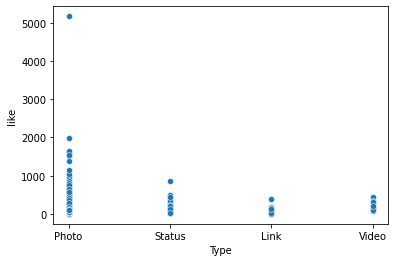

In [157]:
sbn.scatterplot(data =data[['like', 'Type']], x=data['Type'], y=data['like'])

In [158]:
data[['like', 'Type']].groupby(by="Type").sum().sort_values(by="like" ,ascending=False)

,like
Type,
Photo,77610.0
Status,7952.0
Video,1620.0
Link,1613.0


In [159]:
data[['like', 'Post Weekday']].groupby(by="Post Weekday").sum().sort_values(by="like" ,ascending=False)

,like
Post Weekday,
4,15750.0
3,15145.0
1,13895.0
5,11534.0
2,11036.0
6,10875.0
7,10560.0


In [177]:
# modelo de prediccion regresion lineal multiple
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [194]:
Y = data.like
X = data.drop(['like', 'Type', 'Total Interactions', 'Post Weekday', 'Post Month'],axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [195]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [196]:
#Printing the model coefficients
print("interception::",mlr.intercept_)
# pair the feature names with the coefficients
list(zip(X, mlr.coef_))

interception:: 141.9463904571153


[('Category', 34.60786290233268), ('Post Hour', -4.206723072534728)]

In [197]:
#Predicting the Test and Train set result 
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train) 

In [198]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
69,84.0,163.934084
29,143.0,130.280300
471,160.0,233.149810
344,46.0,168.140807
54,66.0,134.487023
...,...,...
460,1546.0,191.082579
152,358.0,194.335224
154,319.0,206.955393
56,164.0,130.280300


In [199]:
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))

print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Error 2 medio:', metrics.r2_score(y_test, y_pred_mlr))
print('varianza:', mlr.score(X, Y))


Mean Absolute Error: 154.6975796625586
Mean Square Error: 106832.01131937462
Root Mean Square Error: 326.8516656212335
Error 2 medio: 0.012451271187194246
varianza: 0.01331472230684072


In [201]:
# Prediccion test 1
"""Category', 0.20304446355306116),
 ('Post Month', 0.7578957559690424),
 ('Post Weekday', -0.1991456047896308),
 ('Post Hour', 0.016447582516881856),
 ('Total Interactions', 0.838775011944392)]"""
vals = [[2,20,5,17,200]]
print("La cantidad de likes será de: ", mlr.predict([[2,11]]))

La cantidad de likes será de:  [164.88816246]


c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
# Probando modelo 2, quitando la variable Total interactions, ya que esta son las interacciones
# que contará con comentarios, etc ...
# Vamos agregar la variables Tipo ya que de acuerdo al tipo de publicacion, foto, video estado, etc,
# suelen variar la cantidad de likes en una publicacion.


In [230]:

data = traindf[["Type", "Post Month","Category", "Post Weekday", "Post Hour", "like", "Total Interactions"]]


In [231]:
"""Photo  Status	 Video	 Link"""
#data.replace({'Type':{'Photo':0,'Status':1, 'Video':2, 'Link':3} }, inplace=True)

data = pd.get_dummies(data)
data

,Post Month,Category,Post Weekday,Post Hour,like,Total Interactions,Type_Link,Type_Photo,Type_Status,Type_Video
0,12,2,4,3,79.0,100,0,1,0,0
1,12,2,3,10,130.0,164,0,0,1,0
2,12,3,3,3,66.0,80,0,1,0,0
3,12,2,2,10,1572.0,1777,0,1,0,0
4,12,2,2,3,325.0,393,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
495,1,3,7,2,53.0,84,0,1,0,0
496,1,2,5,8,53.0,75,0,1,0,0
497,1,1,5,2,93.0,115,0,1,0,0
498,1,3,4,11,91.0,136,0,1,0,0


In [232]:
Y = data.like
X = data.drop(['like'],axis = 1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)

In [233]:
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [234]:
list(zip(X, mlr.coef_))

[('Post Month', 0.9988840661546877),
 ('Category', 0.2582970102956072),
 ('Post Weekday', -0.1827374345645193),
 ('Post Hour', 0.03064886104799959),
 ('Total Interactions', 0.8390415591413551),
 ('Type_Link', 10.09087421513173),
 ('Type_Photo', 6.684874503455811),
 ('Type_Status', -2.0201202274944974),
 ('Type_Video', -14.755628491092974)]

In [235]:
y_pred_mlr= mlr.predict(x_test)  
x_pred_mlr= mlr.predict(x_train) 

In [236]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff

,Actual value,Predicted value
69,84.0,103.387126
29,143.0,129.703458
471,160.0,183.561339
344,46.0,54.696532
54,66.0,73.396171
...,...,...
460,1546.0,1567.812833
152,358.0,383.938847
154,319.0,327.813853
56,164.0,188.558251


In [237]:
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)
print('Error 2 medio:', metrics.r2_score(y_test, y_pred_mlr))
#print('max error:', metrics.max_error(y_pred_mlr, x_pred_mlr))

Mean Absolute Error: 154.6975796625586
Mean Square Error: 106832.01131937462
Root Mean Square Error: 326.8516656212335
Error 2 medio: 0.9939430271968718


In [243]:
print(data.columns)
"""
   Post Month	Post Weekday	Post Hour	like	Type_Link	Type_Photo	Type_Status	Type_Video
0	12	               4	       3	         79.0	   0        	1	               0     	0
"""
print("prediciendo likes de un post de una foto", mlr.predict([[1,2,4,3,10,91,0,0,5]]))

print("prediciendo likes de un post de una foto", mlr.predict([[2,1,7,3,12,81,0,0, 5]]))

Index(['Post Month', 'Category', 'Post Weekday', 'Post Hour', 'like',
       'Total Interactions', 'Type_Link', 'Type_Photo', 'Type_Status',
       'Type_Video'],
      dtype='object')
prediciendo likes de un post de una foto [840.37306342]
prediciendo likes de un post de una foto [741.33477914]


c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\migue\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
